# BoomBikes - US Bike-sharing provider

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

##### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


##### Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 
 
 
### Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.


#### Model Evaluation:
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

- where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
- Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.





## Reading the Data

#### Import requried artifacts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from datetime import datetime # Used to Convert Date and Time


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


#### read the CSV file. 

In [2]:
data = pd.read_csv('day.csv', header = 0, infer_datetime_format = False)

print("Shape of the data:" , data.shape)

data.head()

Shape of the data: (730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Analysis

The Given Dataset is of size 730 records and following 16 columns:

- **instant**: record index
- **dteday** : date
- **season** : season (1:spring, 2:summer, 3:fall, 4:winter)
- **yr** : year (0: 2018, 1:2019)
- **mnth** : month ( 1 to 12)
- **holiday** : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **weekday** : day of the week
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit** : 4 various options (Clear, Mist, Light Snow, Heavy Rain)
- **temp** : temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **hum**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Insights
- The **instant** column holds a sequence of each record. It may not be of interest to our analysis.
- The **dteday** column holds a date information. 
- The **yr** field as per the datadictionary can be enhanced to a map as follows {0: 2018, 1: 2019}.
- The **Weekday** field data is numeric; this is a coded categorical variable. We need to map it to the appropriate DayOfWeek based on the information. 
- Similarly, the **weathersit** field data is numeric; this is a coded categorical variable. We need to map it to the appropriate WeatherSituation based on the information provided in the data dictionary.

### Data Validation & Cleaning

#### Check for Duplicate Records

In [4]:
#### Check for Duplicates
unique_data = data.drop_duplicates(inplace=False)
print(unique_data.shape[0] - data.shape[0], "Duplicate records found in the dataset")

0 Duplicate records found in the dataset


In [5]:
##### Check for Columns having singular values
data.columns.to_series().apply(lambda x: len(data.loc[:, x].unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

__INSIGHT__: The dataset has unique values for all the columns, as respecting the data dictionary.

#### Check for Missing Values in Columns

In [6]:
# Look for Nulls or Missing Data...
data[data.isnull() | data.isna()].sum()

instant       0.0
dteday          0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: object

- The Dataset doesn't have any null values or empty cells. 

#### Data Conversions - dteday

- The Column **dteday** represents a date; However it is listed as an object type. We can convert it as follows:

In [7]:
# Convert the dteday column to a Date Time column:
data.dteday = data.dteday.apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))
data.dteday.info()

<class 'pandas.core.series.Series'>
RangeIndex: 730 entries, 0 to 729
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
730 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


#### Data Conversions - weathersit

- The Column weathersit represents the weather situation (ie, a categorical variable); However it is listed as an integer.
- We can convert the data to string for better representation

In [8]:
# Convert the values of weathersit column. 

if data.weathersit.dtype == 'int64':
    data.weathersit = data.weathersit.apply(lambda x: {1:'1_Clear', 2:'2_Mist', 3:'3_Snow', 4:'4_Rain'}[x])
data.weathersit.value_counts()

Clear    463
Mist     246
Snow      21
Name: weathersit, dtype: int64

#### Data Conversions - season

- The Column season represents the current weather season (ie, a categorical variable); However it is listed as an integer.
- We can convert the data to string based on the input from the data dictionary

In [9]:
# Convert the values of season column. 

if data.season.dtype == 'int64':
    data.season = data.season.apply(lambda x: {1:'1_Spring', 2:'2_Summer', 3:'3_Fall', 4:'4_Winter'}[x])
data.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

##### Validate the column **weekday**

- check if the **weekday** column is matching the day of the week as per the date

In [10]:
# VALIDATE the data weekday.

if data.weekday.dtype == 'int64': # To run only if its a numeric value
    for index in range(0, data.shape[0]):
        if index == 0:
            continue
        elif data.loc[index, 'weekday'] != (data.loc[index-1, 'weekday'] +1) % 7:
                print(data.loc[index-1:index+1, ["instant", "dteday", "weekday"]])


     instant     dteday  weekday
423      424 2019-02-28        2
424      425 2019-03-01        4
425      426 2019-03-02        5


**INSIGHT**: We Observe the data week day has some corrupt values as the values are not in a proper sequence in accordance with the dates.
- The Date _28-02-2019 has a weekday as 2_ while its subsequent day ie., _01-03-2019 has a weekday value as 4_. This is a problem with the data. However, as we have the date column available, we can extract the weekday information from the date column.

##### Correct the data in weekday

In [11]:
## CONVERTING the data from numeric to categorical data (String) as well as it is useful at our later stage for Data Preperation for LR.

data.weekday = data.dteday.apply(lambda x: x.strftime('%w_%a'))

In [12]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,0,1,0,1_Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,Spring,0,1,0,2_Tue,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,Spring,0,1,0,3_Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,Spring,0,1,0,4_Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,Spring,0,1,0,5_Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Correct the data in mnth

In [13]:
import calendar
#data.mnth = data.mnth.apply(lambda x: x+calendar.month_abbr[x])
data.mnth = data.mnth.apply(lambda x: "{:0>2}_".format(x)+ calendar.month_abbr[x])

#### Validate the data

In [14]:
# Check if the count matches the casual and registred values.
mismatched_count = data[(data.casual + data.registered) != data.cnt].shape[0]
print(mismatched_count, "Records of data with mismatch in the total_rides taken.")

0 Records of data with mismatch in the total_rides taken.


#### Rename columns

In [15]:
data.rename(columns={'yr' : 'year', 'mnth': 'month', 'weathersit': 'weather_state', 'atemp': 'feel_temp', 'hum': 'humidity', 'cnt': 'total_count'}, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        730 non-null    int64         
 1   dteday         730 non-null    datetime64[ns]
 2   season         730 non-null    object        
 3   year           730 non-null    int64         
 4   month          730 non-null    object        
 5   holiday        730 non-null    int64         
 6   weekday        730 non-null    object        
 7   workingday     730 non-null    int64         
 8   weather_state  730 non-null    object        
 9   temp           730 non-null    float64       
 10  feel_temp      730 non-null    float64       
 11  humidity       730 non-null    float64       
 12  windspeed      730 non-null    float64       
 13  casual         730 non-null    int64         
 14  registered     730 non-null    int64         
 15  total_count    730 non-

### Summary

- The dataset is loaded with 730 records.
- No duplicate records are found.
- The column *weathersit* is a categorical data represented in coded numeric form. We can convert the data to understandable format using the information provided in the data dictionary.
- The column *season* is a categorical data represented in coded numeric form. We can convert the data to understandable format using the information provided in the data dictionary.
- The uniqueness of the data in each columns looks inline with the datadictionary.
- There was some incorrect data in the *weekday* field, which was corrected with the help of *dteday* column value. 
- The data
- The total **cnt** values of the data are good and matches with the (casual+registered) value.




### Insights

> The Column **total_count** holds the dependent variable (or the Target Variable) as our aim is to identify the demand for the shared bikes. The demand increase is indicated by the increase in the counts. 

- The columns casual & registered are obsolete as the analysis is not focused on various types of sharing.

> The independent variables include: season, year, month, holiday, weekday, workingday, weather_state, temp, feel_temp, humidity, windspeed


## Data Visualization

> Visualize the dependent variable across the independent variables inorder to verify if a Linear Regression Model fits or not. 

In [17]:
categorical_variables = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_state']
continuous_variables = ['temp', 'feel_temp', 'humidity', 'windspeed']

##### Analysis of Continuous Variables

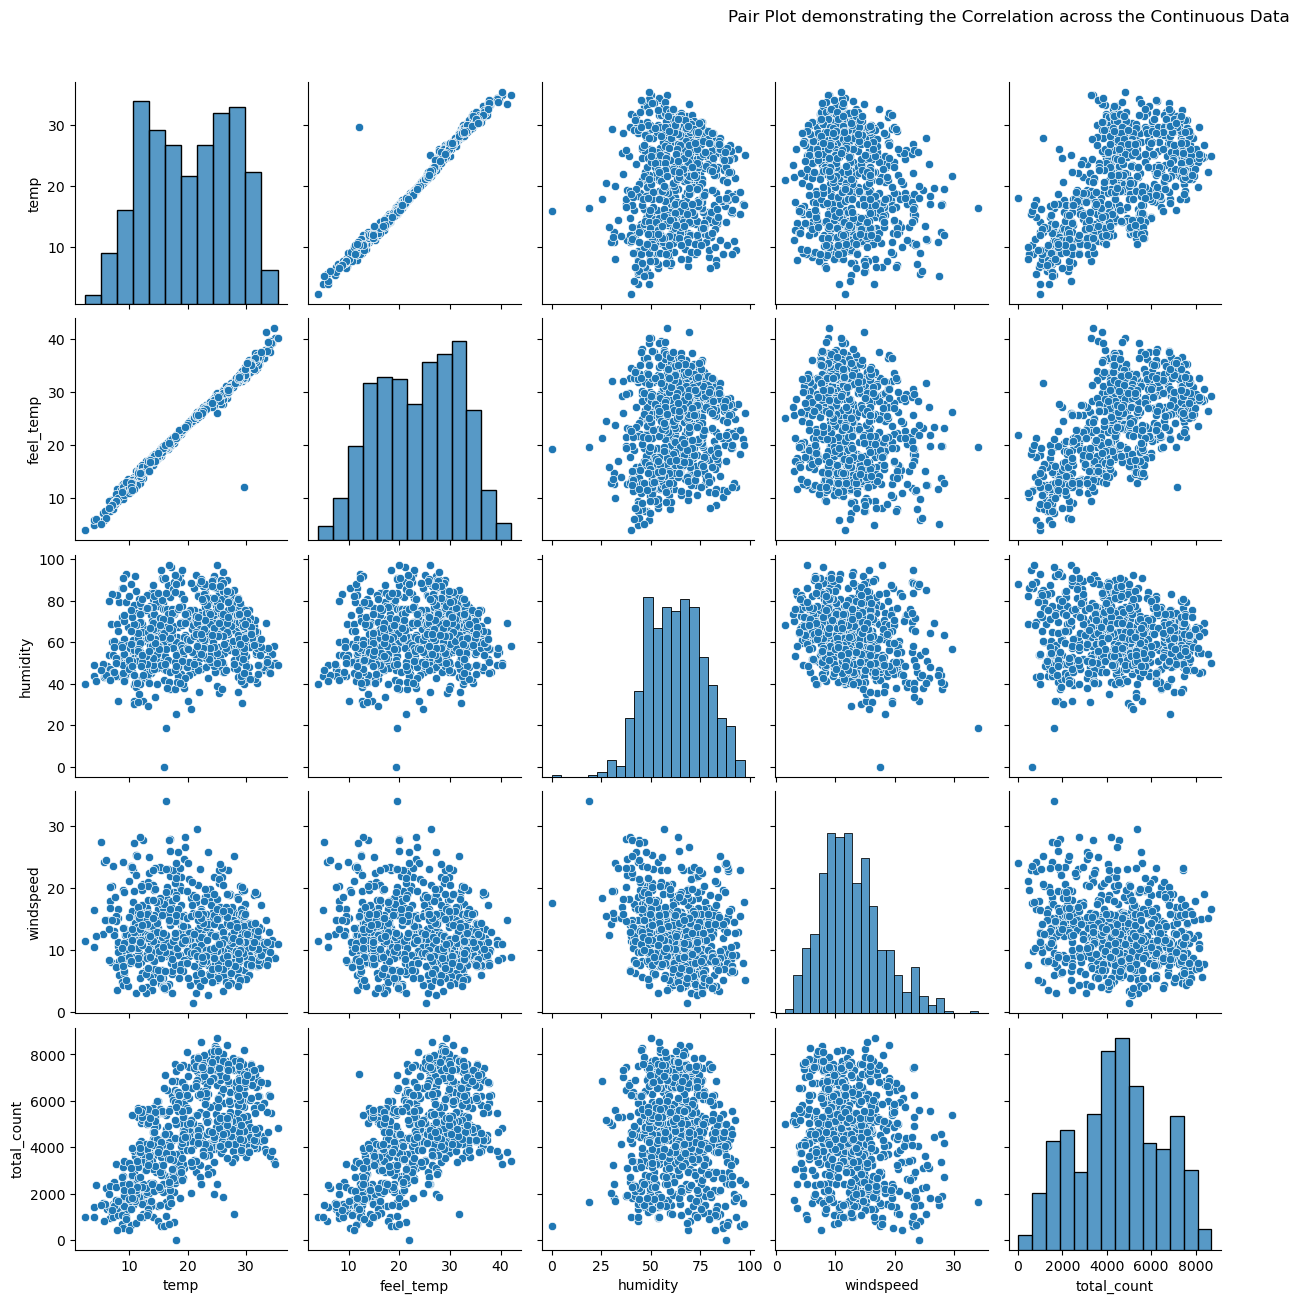

In [18]:
sns.pairplot(data[continuous_variables + ['total_count']])
plt.title('Pair Plot demonstrating the Correlation across the Continuous Data', y=5.5, x=0.0 )
plt.show()

> The total_count seems to have a correation between the temp, feel_temp fields


> Also, the temp and feel_temp seems to have a very high correlation as most of the dots in the scatter plot are aligned forming  a straight line.



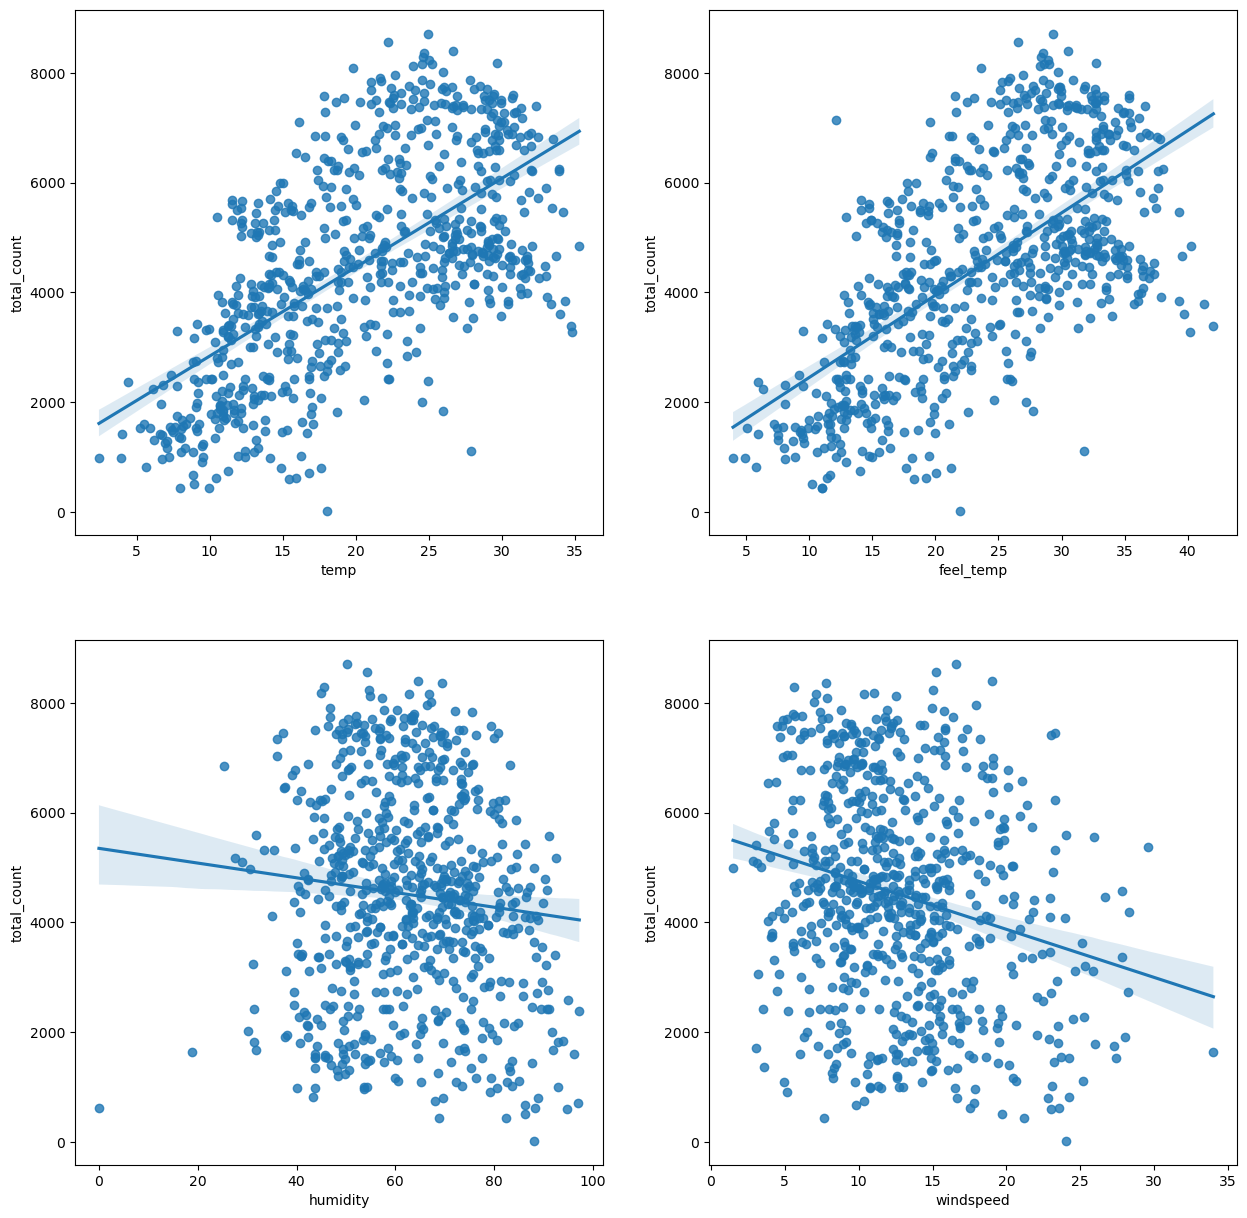

In [19]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.regplot(data=data, x='temp', y='total_count')

plt.subplot(2,2,2)
sns.regplot(data=data, x='feel_temp', y='total_count')

plt.subplot(2,2,3)
sns.regplot(data=data, x='humidity', y='total_count')

plt.subplot(2,2,4)
sns.regplot(data=data, x='windspeed', y='total_count')
plt.show()

**Data Shows**
- A good +ve correlation between the total_count and the temp variable.
- A good +ve correlation between the total_count and the feel_temp variable.
- A week -ve correlation between the total_count and the humidity variable.
- A good -ve correlation between the total_count and the humidity variable.

#### Analysis of Categorical Variables

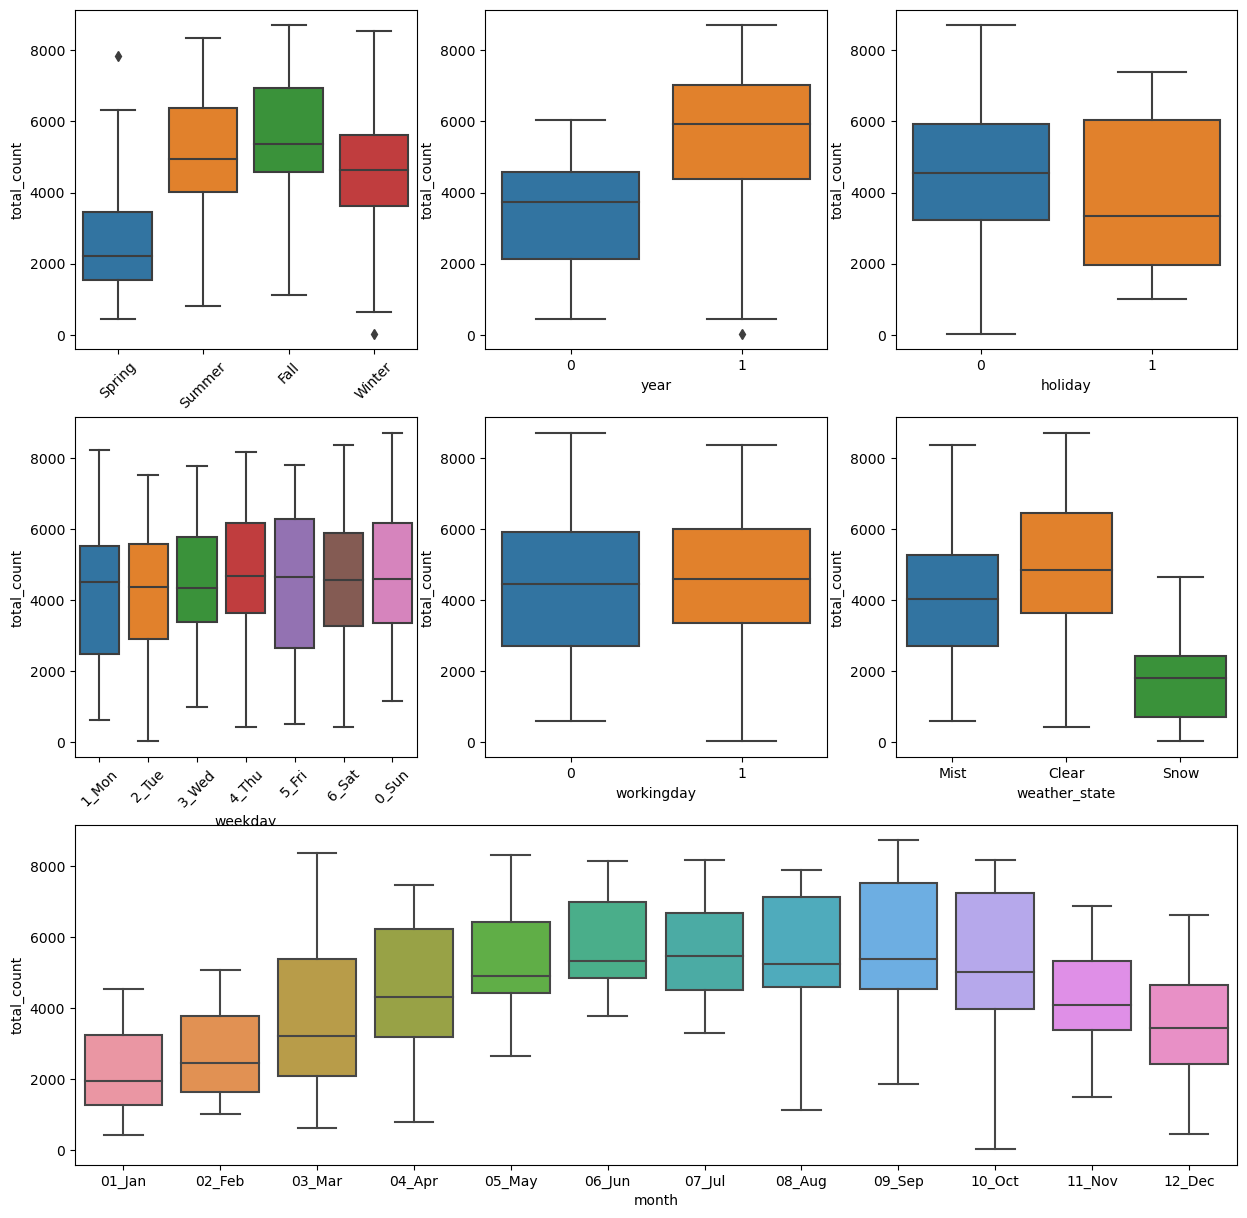

In [20]:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
sns.boxplot(data=data, x='season', y='total_count')
plt.xticks(rotation=45)

#plt.show()

plt.subplot(3,3,2)
sns.boxplot(data=data, x='year', y='total_count')
#plt.xticks(rotation=45)

#plt.show()

plt.subplot(3,3,3)
sns.boxplot(data=data, x='holiday', y='total_count')
#plt.xticks(rotation=45)

#plt.show()

plt.subplot(3,3,4)
sns.boxplot(data=data, x='weekday', y='total_count')
plt.xticks(rotation=45)


#plt.show()
plt.subplot(3,3,5)
sns.boxplot(data=data, x='workingday', y='total_count')
#plt.xticks(rotation=45)

#plt.show()

plt.subplot(3,3,6)
sns.boxplot(data=data, x='weather_state', y='total_count')
#plt.xticks(rotation=45)

#plt.show()
plt.subplot(3,3,(7, 9))
sns.boxplot(data=data, x='month', y='total_count')
#plt.xticks(rotation=45)

plt.show()

##### Observations 
- Most of the variables have no outliers and the data seems well distributed.
- There seems to be a high number of bike borrowers during the fall season.
- There seems to be a considerate amount of increase in the sales in yoy.
- There seems to be consistent bike borrowers during working days.. and this count is low during holidays. This could mean that the bike sharing is more actively done at activity zones corresponding to the working days schedule.

- The average bike borrowers is constant for any day of the week. However, we see less amount during mondays and fridays. 

- There seems to be a good of total_counts based on the weather; and with clear weather attracting highest amount of counts. 

- We observe a pattern of consistent increase during the months 8,9,10 and eventually drops down following a normal distribution. Also, the variantion of the monthly data shows it affects the total_counts.


> **Conslusion**: There are atleast few variables that are +vely correlated with the value_counts.

#### Variables of Linear Regression

- Dependent Variable: **cnt**
- Independent Variables: *season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed*

### Data Preperation

##### Encoding the Data
- The Data in categorical variables to dummy variables.

In [21]:
# Variables that can be converted to dummy variables:
dummy_vars = ['season','weekday','weather_state','month']

for each_var in dummy_vars:
    data = pd.concat([data, pd.get_dummies(data[each_var], drop_first=True)], axis=1)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        730 non-null    int64         
 1   dteday         730 non-null    datetime64[ns]
 2   season         730 non-null    object        
 3   year           730 non-null    int64         
 4   month          730 non-null    object        
 5   holiday        730 non-null    int64         
 6   weekday        730 non-null    object        
 7   workingday     730 non-null    int64         
 8   weather_state  730 non-null    object        
 9   temp           730 non-null    float64       
 10  feel_temp      730 non-null    float64       
 11  humidity       730 non-null    float64       
 12  windspeed      730 non-null    float64       
 13  casual         730 non-null    int64         
 14  registered     730 non-null    int64         
 15  total_count    730 non-

- We can remove the old columns and create a new dataset. 

In [22]:
#data.drop(['instant', 'dteday', 'season', 'month', 'weekday', 'weather_state', 'casual', 'registered'], axis=1).columns
#analysis_data = data[[ 'year','holiday',
#                       'workingday', 'temp', 'feel_temp', 'humidity',
#                       'windspeed', 'total_count', 'Spring', 'Summer',
#                       'Winter', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
#                       'Wednesday', 'Mist', 'Snow', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
#                       'Mar', 'May', 'Nov', 'Oct', 'Sep']]
analysis_data = data.drop(['instant', 'dteday', 'season', 'month', 'weekday', 'weather_state', 'casual', 'registered'], axis=1)
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   feel_temp    730 non-null    float64
 5   humidity     730 non-null    float64
 6   windspeed    730 non-null    float64
 7   total_count  730 non-null    int64  
 8   Spring       730 non-null    uint8  
 9   Summer       730 non-null    uint8  
 10  Winter       730 non-null    uint8  
 11  1_Mon        730 non-null    uint8  
 12  2_Tue        730 non-null    uint8  
 13  3_Wed        730 non-null    uint8  
 14  4_Thu        730 non-null    uint8  
 15  5_Fri        730 non-null    uint8  
 16  6_Sat        730 non-null    uint8  
 17  Mist         730 non-null    uint8  
 18  Snow         730 non-null    uint8  
 19  02_Feb  

In [23]:
analysis_data.describe()

,year,holiday,workingday,temp,feel_temp,humidity,windspeed,total_count,Spring,Summer,...,03_Mar,04_Apr,05_May,06_Jun,07_Jul,08_Aug,09_Sep,10_Oct,11_Nov,12_Dec
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.084932
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.278971
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting the Data

- Splitting the data in the form of 70% as training set and 30% as testing data sets.

In [24]:
df_train, df_test = train_test_split(analysis_data, train_size=0.7, random_state = 100)
print("Training Dataset:", df_train.shape)
print("Training Dataset:", df_test.shape)

Training Dataset: (510, 30)
Training Dataset: (220, 30)


### Feature Scaling

- To ensure the variables are on the same scale we can rescale the data. Rescaling helps normalize the data so that their coefficients can be compared/interpretted. 
- For this Case-Study, we'll use the Min-Max scaling; which will compress the data between 0-1.
- Rescaling is to be done only for the numeric variables.

In [25]:
analysis_data.describe().loc[['min', 'max'], :].transpose().sort_values('max', ascending=False)
# Look for the min-max values not in the range of 0-1...

,min,max
total_count,22.000000,8714.000000
humidity,0.000000,97.250000
feel_temp,3.953480,42.044800
temp,2.424346,35.328347
windspeed,1.500244,34.000021
year,0.000000,1.000000
07_Jul,0.000000,1.000000
03_Mar,0.000000,1.000000
04_Apr,0.000000,1.000000
05_May,0.000000,1.000000


In [26]:
numeric_variables = ['temp','feel_temp','humidity','windspeed', 'total_count']

In [27]:
# Initialize the MinMaxScaler
min_max_scaler_train = MinMaxScaler() #Normalization
df_train[numeric_variables] = min_max_scaler_train.fit_transform(df_train[numeric_variables])
df_train.head()
df_train.describe()

,year,holiday,workingday,temp,feel_temp,humidity,windspeed,total_count,Spring,Summer,...,03_Mar,04_Apr,05_May,06_Jun,07_Jul,08_Aug,09_Sep,10_Oct,11_Nov,12_Dec
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


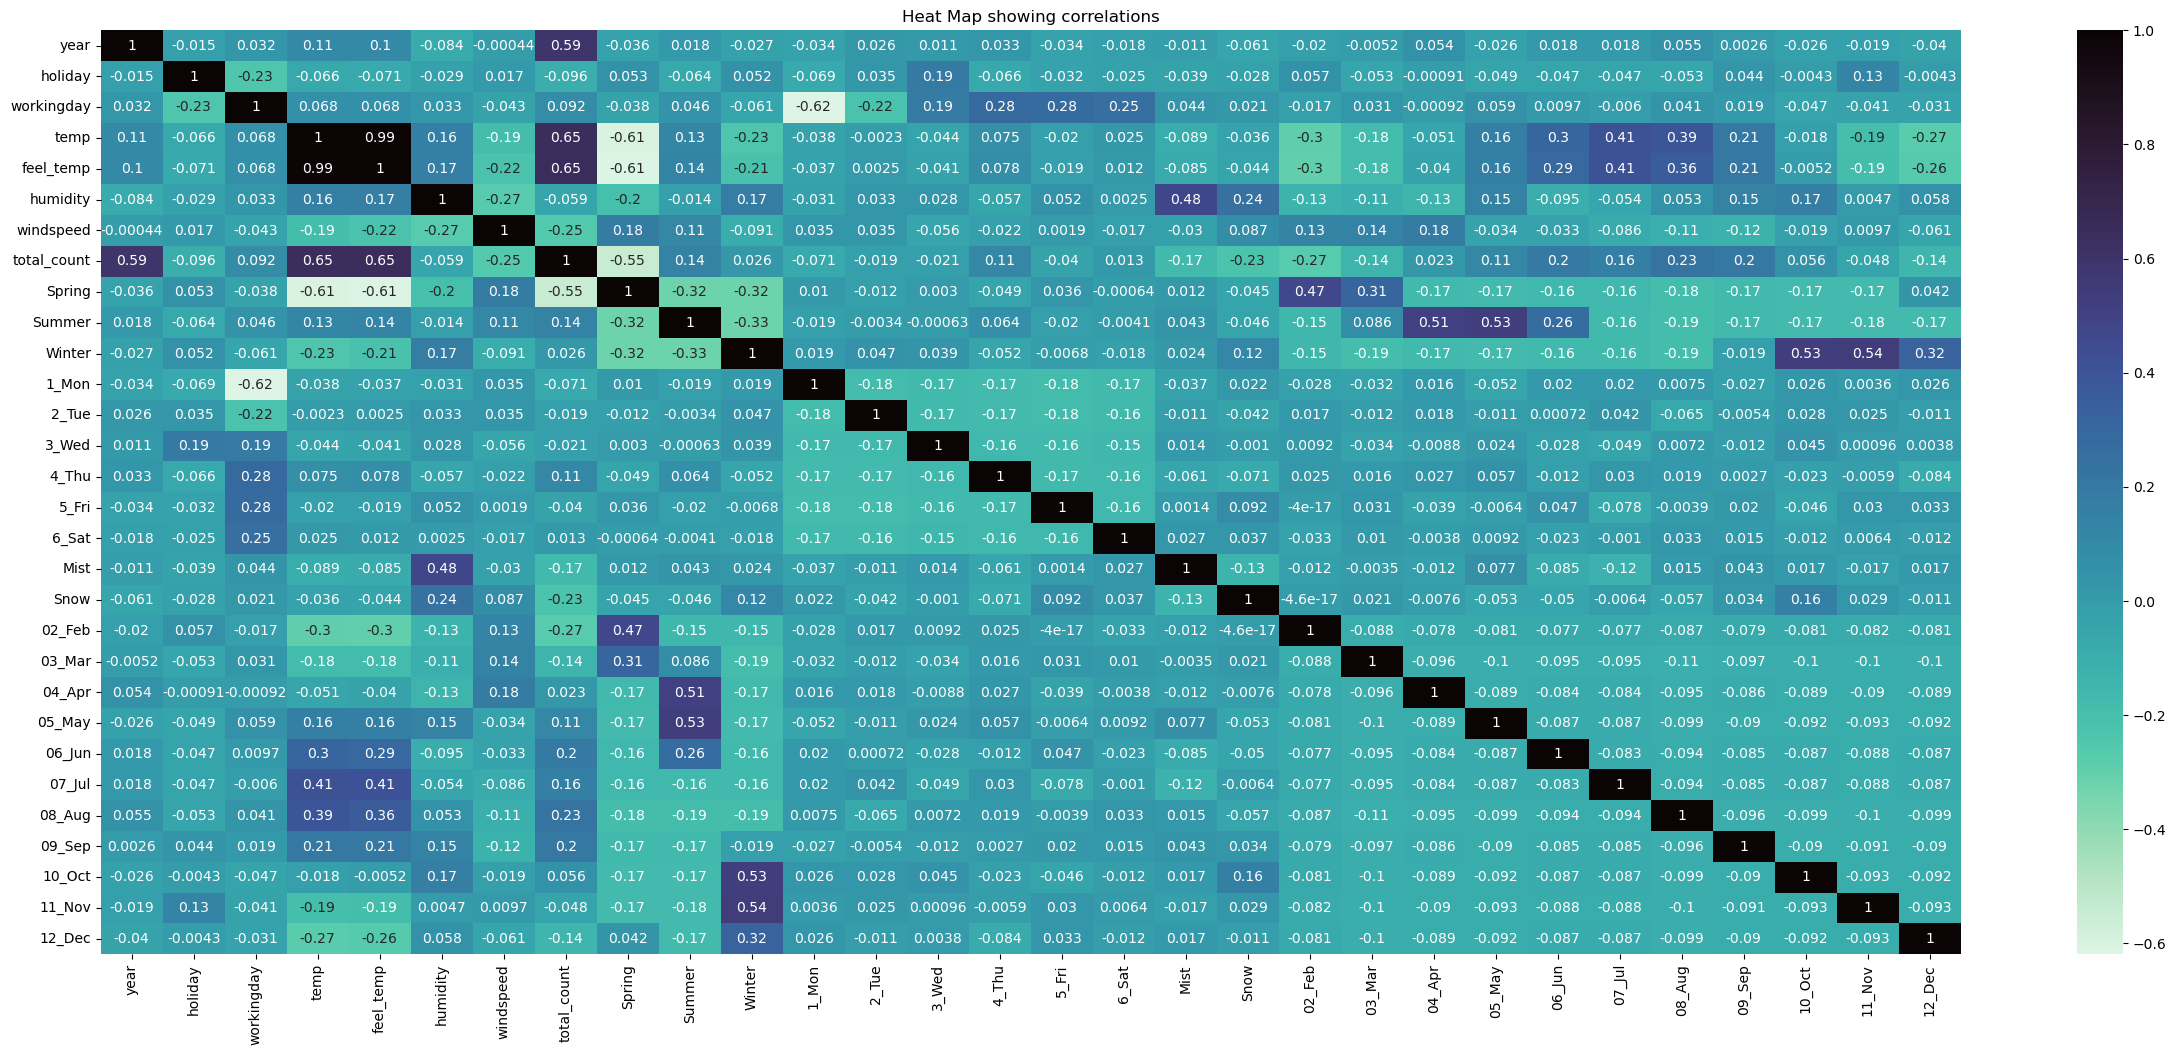

In [28]:
plt.figure( figsize=(30,12))

sns.heatmap(data=df_train.corr(), annot=True, cmap="mako_r")

plt.title("Heat Map showing correlations")
plt.show()

INSIGHTS:
    The heatmap reveals that there is a strong correlation of total_count with the temperature. 

### Building the Model

- Let's assume the following:
    - The value of alpha (significance level) is set to 5% (ie., 0.05%)

##### Create separate sets for X (independent variables) and y (dependent variables)

In [29]:
y_train = df_train.pop('total_count')
X_train = df_train

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   feel_temp   510 non-null    float64
 5   humidity    510 non-null    float64
 6   windspeed   510 non-null    float64
 7   Spring      510 non-null    uint8  
 8   Summer      510 non-null    uint8  
 9   Winter      510 non-null    uint8  
 10  1_Mon       510 non-null    uint8  
 11  2_Tue       510 non-null    uint8  
 12  3_Wed       510 non-null    uint8  
 13  4_Thu       510 non-null    uint8  
 14  5_Fri       510 non-null    uint8  
 15  6_Sat       510 non-null    uint8  
 16  Mist        510 non-null    uint8  
 17  Snow        510 non-null    uint8  
 18  02_Feb      510 non-null    uint8  
 19  03_Mar      510 non-null   

In [31]:
def prepare_lr_model(X: pd.Series, y: pd.Series, variables:set[str] =[]): #
    if len(variables) == 0:
        X_train = X
    else:
        X_train = X[variables]

    X_train_sm = sm.add_constant(X_train)
    linear_reg = sm.OLS(y, X_train_sm)
    linear_reg_model = linear_reg.fit()
    #print(linear_reg_model.summary())
    return linear_reg_model

##### Simple Linear Regression

In [32]:
lr_with_temp = prepare_lr_model(X_train, y_train, ['temp'])

lr_with_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 09 May 2023   Prob (F-statistic):           2.46e-61
Time:                        18:32:06   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Insights
- The Simple regression model (SLR) with only Temperature variable.
- The coefficients are both positive. As the temp. goes up, the counts are going up.
- The SLR has a P value of both the constant and the temperature to be 0 ==> The Coefficients are statistically significant. 
- The R2 value for this SLR is 0.416 ==> 41.6% of the variance in data can be explained by the temperature.
- The Adj.R2 value is 0.415.

##### Multiple Linear Regression

Multiple Linear Regression

- Approach: Forward addition.
    - We'll start adding one more variable and prepare the model.
        Using the insights, we'll check the next step.

In [33]:
lr_with_temp_feel_temp = prepare_lr_model(X_train, y_train, ['temp', 'feel_temp'])

lr_with_temp_feel_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 09 May 2023   Prob (F-statistic):           8.38e-61
Time:                        18:32:06   Log-Likelihood:                 178.05
No. Observations:                 510   AIC:                            -350.1
Df Residuals:                     507   BIC:                            -337.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.020      8.198      0.000       0.124       0.202
temp           0.1853      0.233      0.796      0.426      -0.272       0.643
feel_temp      0.4896      0.248      1.977      0.049       0.003       0.976
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Insights
- The Multiple regression model (MLR) with temp and feel_temp variables.
- All the coefficients are positive.
- The P-Value of both the the temp and feel_temp are not 0 and is greater than the Alpha Value of (0.05). Hence, we cannot conclude that the value of temp would actually effect the dependent variable total_count. 
    - This was contrary to our earlier analysis. It is due to the inclusion of the feel_temp variable which makes the temp conclusively ineffective. 
    - The P-Value of the temp is 0.426
==> The Coefficients cannot be concluded that they are statistically significant. 
- The R2 value for this MLR is 0.421.
- The Adj.R2 value is 0.418.

In [34]:
 prepare_lr_model(X_train, y_train, ['feel_temp']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Tue, 09 May 2023   Prob (F-statistic):           4.77e-62
Time:                        18:32:06   Log-Likelihood:                 177.73
No. Observations:                 510   AIC:                            -351.5
Df Residuals:                     508   BIC:                            -343.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.020      8.181      0.000       0.123       0.201
feel_temp      0.6846      0.036     19.173      0.000       0.614       0.755
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Change of approach to backward**
- Add all and remove the ineffective columns...

In [35]:
backward_results_0 = prepare_lr_model(X_train, y_train)
backward_results_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.80
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.77e-177
Time:                        18:32:06   Log-Likelihood:                 522.69
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     480   BIC:                            -858.3
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2758      0.043      6.383      0.000       0.191       0.361
year           0.2316      0.008     28.424      0.000       0.216       0.248
holiday       -0.0835      0.029     -2.875      0.004      -0.140      -0.026
workingday     0.0002      0.015      0.012      0.990      -0.029       0.029
temp           0.3907      0.144      2.720      0.007       0.108       0.673
feel_temp      0.0528      0.140      0.378      0.705      -0.221       0.327
humidity      -0.1570      0.039     -4.027      0.000      -0.234      -0.080
windspeed     -0.1810      0.027     -6.774      0.000      -0.233      -0.128
Spring        -0.0406      0.030     -1.337      0.182      -0.100       0.019
Summer         0.0460      0.026      1.737      0.083      -0.006       0.098
Winter         0.1114      0.028      3.941      0.000       0.056       0.167
1_Mon         -0.0343      0.017     -2.033      0.043      -0.067      -0.001
2_Tue         -0.0355      0.015     -2.375      0.018      -0.065      -0.006
3_Wed         -0.0192      0.017     -1.136      0.257      -0.052       0.014
4_Thu         -0.0057      0.017     -0.339      0.735      -0.038       0.027
5_Fri         -0.0097      0.017     -0.586      0.558      -0.042       0.023
6_Sat         -0.0059      0.017     -0.347      0.729      -0.039       0.027
Mist          -0.0576      0.011     -5.463      0.000      -0.078      -0.037
Snow          -0.2491      0.027     -9.312      0.000      -0.302      -0.197
02_Feb         0.0268      0.021      1.288      0.198      -0.014       0.068
03_Mar         0.0645      0.023      2.854      0.005       0.020       0.109
04_Apr         0.0636      0.034      1.874      0.062      -0.003       0.130
05_May         0.0885      0.037      2.420      0.016       0.017       0.160
06_Jun         0.0726      0.039      1.845      0.066      -0.005       0.150
07_Jul         0.0355      0.044      0.799      0.425      -0.052       0.123
08_Aug         0.0919      0.042      2.169      0.031       0.009       0.175
09_Sep         0.1552      0.038      4.104      0.000       0.081       0.230
10_Oct         0.0700      0.035      2.007      0.045       0.001       0.139
11_Nov         0.0229      0.033      0.689      0.491      -0.042       0.088
12_Dec         0.0200      0.027      0.744      0.457      -0.033       0.073
==============================================================================
Omnibus:                       78.192   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.835
Skew:                          -0.769   Prob(JB):                     9.01e-45
Kurtosis:                       5.680   Cond. No.                         92.1
==============================================================================

N

#### INSIGHTS
- Following variables are -vely correlated as their coefficients are -ve:


In [36]:
backward_results_0.params[backward_results_0.params<0].index

Index(['holiday', 'humidity', 'windspeed', 'Spring', '1_Mon', '2_Tue', '3_Wed',
       '4_Thu', '5_Fri', '6_Sat', 'Mist', 'Snow'],
      dtype='object')

**The P-Values for the following variables are high than the significance factor (alpha = 0.05)**

In [37]:
backward_results_0.pvalues[backward_results_0.pvalues > 0.05]

workingday    0.990085
feel_temp     0.705407
Spring        0.181701
Summer        0.082995
3_Wed         0.256649
4_Thu         0.734834
5_Fri         0.558044
6_Sat         0.728545
02_Feb        0.198258
04_Apr        0.061515
06_Jun        0.065593
07_Jul        0.424579
11_Nov        0.491003
12_Dec        0.457242
dtype: float64

> **As all these columns cannot be ignored, we will further analyze the VIF factor to decide on what variables can be ignored.**

In [38]:
def calculate_vif(X: pd.Series, variables:set[str] =[]):
    vif = pd.DataFrame()
    features_to_analyse = variables
    X_train = X[variables]
    if len(variables) == 0:
        features_to_analyse = X.columns
        X_train = X
    vif['Features'] = features_to_analyse
    vif['VIF'] = [round(variance_inflation_factor(X_train.values, i), 3) for i in range(X_train.shape[1])]
    vif.sort_values(by='VIF', ascending=False)
    vif.set_index('Features', inplace=True)
    return vif

In [39]:
def compare_results(vif: pd.Series, p_values:  pd.Series):
    results_to_compare = pd.concat([vif, round(p_values, 3)], axis=1)

    results_to_compare.rename(columns={0:'P_Value'}, inplace=True)
    results_to_compare.sort_values(by=['P_Value', 'VIF'], ascending=[False, False], inplace=True)
    return results_to_compare


##### LOCAL FUNCTIONS: 


    prepare_lr_model(X, y, [vars])  ==> Linear Regression summary
    calculate_vif(X, [vars]) ==> Calculation of the Variable Influence Factors.
    compare_results(vif, p_values) ===> Returns a Series of data with VIF and P-Values sorted with P-Values, VIF in descending order.

##### Compute the VIF and compare with the P-Values for all the backward calculation.

In [40]:
vif = calculate_vif(X_train)
p_values = round(backward_results_0.pvalues, 3)
backward_compare = compare_results(vif, p_values)
backward_compare

,VIF,P_Value
workingday,9.217,0.990
4_Thu,2.520,0.735
6_Sat,2.360,0.729
feel_temp,382.550,0.705
5_Fri,2.566,0.558
11_Nov,5.406,0.491
12_Dec,3.449,0.457
07_Jul,7.726,0.425
3_Wed,2.435,0.257
02_Feb,1.786,0.198


#### INSIGHTS

- From the above data, we see that there variables with very large number of P-Values and VIF factors. 
- This category can be broken in to 4 sets:
    - Variables with HIGH VIF and P Values...
    - Variables with LOW  VIF and P Values...
    - Variables with HIGH VIF and LOW P Values...
    - Variables with LOW VIF and HIGH P Values...

##### TODO:

- From the above insights, we observe that the workingday field has more P_Value of 0.990 (which is >>> 0.05 - significance level). Hence, let's try eleminating the variable.

In [41]:
## Variables with Both High VIF and P_Values
backward_compare[(backward_compare['VIF'] > 10) & (backward_compare['P_Value'] > 0.05)]

,VIF,P_Value
feel_temp,382.55,0.705


In [42]:
variables_involved_in_model = X_train.columns
variables_involved_in_model = variables_involved_in_model.drop('feel_temp')
print(variables_involved_in_model)
backward_results_01 = prepare_lr_model(X_train, y_train, variables_involved_in_model)
backward_results_01.summary()

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'Spring', 'Summer', 'Winter', '1_Mon', '2_Tue', '3_Wed', '4_Thu',
       '5_Fri', '6_Sat', 'Mist', 'Snow', '02_Feb', '03_Mar', '04_Apr',
       '05_May', '06_Jun', '07_Jul', '08_Aug', '09_Sep', '10_Oct', '11_Nov',
       '12_Dec'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.32
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.91e-178
Time:                        18:32:07   Log-Likelihood:                 522.61
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     481   BIC:                            -864.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2757      0.043      6.386      0.000       0.191       0.360
year           0.2315      0.008     28.450      0.000       0.216       0.248
holiday       -0.0838      0.029     -2.893      0.004      -0.141      -0.027
workingday     0.0004      0.015      0.026      0.980      -0.029       0.030
temp           0.4421      0.047      9.444      0.000       0.350       0.534
humidity      -0.1565      0.039     -4.020      0.000      -0.233      -0.080
windspeed     -0.1832      0.026     -7.025      0.000      -0.234      -0.132
Spring        -0.0401      0.030     -1.324      0.186      -0.100       0.019
Summer         0.0466      0.026      1.764      0.078      -0.005       0.098
Winter         0.1119      0.028      3.966      0.000       0.056       0.167
1_Mon         -0.0341      0.017     -2.027      0.043      -0.067      -0.001
2_Tue         -0.0354      0.015     -2.374      0.018      -0.065      -0.006
3_Wed         -0.0192      0.017     -1.141      0.255      -0.052       0.014
4_Thu         -0.0057      0.017     -0.343      0.732      -0.038       0.027
5_Fri         -0.0098      0.017     -0.592      0.554      -0.042       0.023
6_Sat         -0.0064      0.017     -0.378      0.706      -0.040       0.027
Mist          -0.0577      0.011     -5.472      0.000      -0.078      -0.037
Snow          -0.2498      0.027     -9.368      0.000      -0.302      -0.197
02_Feb         0.0269      0.021      1.293      0.197      -0.014       0.068
03_Mar         0.0645      0.023      2.855      0.004       0.020       0.109
04_Apr         0.0638      0.034      1.881      0.061      -0.003       0.130
05_May         0.0879      0.037      2.408      0.016       0.016       0.160
06_Jun         0.0715      0.039      1.824      0.069      -0.006       0.149
07_Jul         0.0346      0.044      0.781      0.435      -0.053       0.122
08_Aug         0.0904      0.042      2.145      0.032       0.008       0.173
09_Sep         0.1547      0.038      4.097      0.000       0.080       0.229
10_Oct         0.0701      0.035      2.011      0.045       0.002       0.139
11_Nov         0.0231      0.033      0.696      0.487      -0.042       0.088
12_Dec         0.0202      0.027      0.753      0.452      -0.032       0.073
==============================================================================
Omnibus:                       77.508   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.650
Skew:                          -0.763   Prob(JB):                     2.69e-44
Kurtosis:                       5.667   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [43]:
vif = calculate_vif(X_train[variables_involved_in_model], variables_involved_in_model)
p_values = round(backward_results_01.pvalues, 3)
backward_compare = compare_results(vif, p_values)
backward_compare

,VIF,P_Value
workingday,9.207,0.980
4_Thu,2.520,0.732
6_Sat,2.346,0.706
5_Fri,2.565,0.554
11_Nov,5.405,0.487
12_Dec,3.447,0.452
07_Jul,7.694,0.435
3_Wed,2.435,0.255
02_Feb,1.786,0.197
Spring,7.391,0.186


In [44]:
## Variables with Both High VIF and P_Values
backward_compare[(backward_compare['VIF'] > 10) & (backward_compare['P_Value'] > 0.05)]

,VIF,P_Value


In [45]:
variables_involved_in_model = variables_involved_in_model.drop('Spring')
print(variables_involved_in_model)
backward_results_02 = prepare_lr_model(X_train, y_train, variables_involved_in_model)
backward_results_02.summary()

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'Summer', 'Winter', '1_Mon', '2_Tue', '3_Wed', '4_Thu', '5_Fri',
       '6_Sat', 'Mist', 'Snow', '02_Feb', '03_Mar', '04_Apr', '05_May',
       '06_Jun', '07_Jul', '08_Aug', '09_Sep', '10_Oct', '11_Nov', '12_Dec'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     100.7
Date:                Tue, 09 May 2023   Prob (F-statistic):          4.48e-179
Time:                        18:32:07   Log-Likelihood:                 521.68
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     482   BIC:                            -868.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2361      0.031      7.578      0.000       0.175       0.297
year           0.2312      0.008     28.402      0.000       0.215       0.247
holiday       -0.0839      0.029     -2.894      0.004      -0.141      -0.027
workingday     0.0008      0.015      0.057      0.955      -0.028       0.030
temp           0.4499      0.046      9.679      0.000       0.359       0.541
humidity      -0.1584      0.039     -4.068      0.000      -0.235      -0.082
windspeed     -0.1859      0.026     -7.147      0.000      -0.237      -0.135
Summer         0.0694      0.020      3.469      0.001       0.030       0.109
Winter         0.1343      0.023      5.941      0.000       0.090       0.179
1_Mon         -0.0348      0.017     -2.069      0.039      -0.068      -0.002
2_Tue         -0.0358      0.015     -2.397      0.017      -0.065      -0.006
3_Wed         -0.0196      0.017     -1.162      0.246      -0.053       0.014
4_Thu         -0.0057      0.017     -0.344      0.731      -0.039       0.027
5_Fri         -0.0102      0.017     -0.613      0.540      -0.043       0.022
6_Sat         -0.0073      0.017     -0.435      0.664      -0.041       0.026
Mist          -0.0573      0.011     -5.433      0.000      -0.078      -0.037
Snow          -0.2475      0.027     -9.293      0.000      -0.300      -0.195
02_Feb         0.0264      0.021      1.267      0.206      -0.015       0.067
03_Mar         0.0692      0.022      3.097      0.002       0.025       0.113
04_Apr         0.0791      0.032      2.476      0.014       0.016       0.142
05_May         0.1017      0.035      2.906      0.004       0.033       0.171
06_Jun         0.0926      0.036      2.581      0.010       0.022       0.163
07_Jul         0.0695      0.036      1.948      0.052      -0.001       0.140
08_Aug         0.1258      0.033      3.860      0.000       0.062       0.190
09_Sep         0.1859      0.029      6.306      0.000       0.128       0.244
10_Oct         0.0853      0.033      2.591      0.010       0.021       0.150
11_Nov         0.0394      0.031      1.279      0.202      -0.021       0.100
12_Dec         0.0315      0.025      1.242      0.215      -0.018       0.081
==============================================================================
Omnibus:                       75.545   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.304
Skew:                          -0.750   Prob(JB):                     1.74e-42
Kurtosis:                       5.608   Cond. No.                         39.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif = calculate_vif(X_train[variables_involved_in_model], variables_involved_in_model)
p_values = round(backward_results_02.pvalues, 3)
backward_compare = compare_results(vif, p_values)
backward_compare

,VIF,P_Value
workingday,8.988,0.955
4_Thu,2.505,0.731
6_Sat,2.312,0.664
5_Fri,2.549,0.540
3_Wed,2.410,0.246
12_Dec,3.381,0.215
02_Feb,1.717,0.206
11_Nov,5.162,0.202
07_Jul,6.185,0.052
1_Mon,2.477,0.039


In [47]:
## Variables with Both High VIF and P_Values
backward_compare[(backward_compare['VIF'] > 10) & (backward_compare['P_Value'] > 0.05)]

,VIF,P_Value


In [48]:
variables_involved_in_model

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'Summer', 'Winter', '1_Mon', '2_Tue', '3_Wed', '4_Thu', '5_Fri',
       '6_Sat', 'Mist', 'Snow', '02_Feb', '03_Mar', '04_Apr', '05_May',
       '06_Jun', '07_Jul', '08_Aug', '09_Sep', '10_Oct', '11_Nov', '12_Dec'],
      dtype='object')

In [49]:
backward_compare

,VIF,P_Value
workingday,8.988,0.955
4_Thu,2.505,0.731
6_Sat,2.312,0.664
5_Fri,2.549,0.540
3_Wed,2.410,0.246
12_Dec,3.381,0.215
02_Feb,1.717,0.206
11_Nov,5.162,0.202
07_Jul,6.185,0.052
1_Mon,2.477,0.039


- Dropping the column workingday as it has high p-value and 5<VIF<10.

In [50]:
variables_involved_in_model = variables_involved_in_model.drop('workingday')
print(variables_involved_in_model)
backward_results_03 = prepare_lr_model(X_train, y_train, variables_involved_in_model)

backward_results_03.summary()

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'Summer', 'Winter',
       '1_Mon', '2_Tue', '3_Wed', '4_Thu', '5_Fri', '6_Sat', 'Mist', 'Snow',
       '02_Feb', '03_Mar', '04_Apr', '05_May', '06_Jun', '07_Jul', '08_Aug',
       '09_Sep', '10_Oct', '11_Nov', '12_Dec'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     104.8
Date:                Tue, 09 May 2023   Prob (F-statistic):          4.33e-180
Time:                        18:32:07   Log-Likelihood:                 521.68
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     483   BIC:                            -875.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2365      0.030      7.834      0.000       0.177       0.296
year           0.2312      0.008     28.445      0.000       0.215       0.247
holiday       -0.0846      0.026     -3.217      0.001      -0.136      -0.033
temp           0.4498      0.046      9.690      0.000       0.359       0.541
humidity      -0.1584      0.039     -4.072      0.000      -0.235      -0.082
windspeed     -0.1859      0.026     -7.155      0.000      -0.237      -0.135
Summer         0.0694      0.020      3.472      0.001       0.030       0.109
Winter         0.1343      0.023      5.947      0.000       0.090       0.179
1_Mon         -0.0353      0.015     -2.383      0.018      -0.064      -0.006
2_Tue         -0.0359      0.015     -2.409      0.016      -0.065      -0.007
3_Wed         -0.0192      0.015     -1.243      0.215      -0.050       0.011
4_Thu         -0.0053      0.015     -0.353      0.724      -0.035       0.024
5_Fri         -0.0098      0.015     -0.649      0.516      -0.039       0.020
6_Sat         -0.0070      0.015     -0.451      0.652      -0.037       0.023
Mist          -0.0573      0.011     -5.441      0.000      -0.078      -0.037
Snow          -0.2475      0.027     -9.303      0.000      -0.300      -0.195
02_Feb         0.0264      0.021      1.267      0.206      -0.015       0.067
03_Mar         0.0692      0.022      3.101      0.002       0.025       0.113
04_Apr         0.0791      0.032      2.480      0.013       0.016       0.142
05_May         0.1018      0.035      2.910      0.004       0.033       0.170
06_Jun         0.0927      0.036      2.586      0.010       0.022       0.163
07_Jul         0.0696      0.036      1.954      0.051      -0.000       0.140
08_Aug         0.1259      0.033      3.866      0.000       0.062       0.190
09_Sep         0.1860      0.029      6.316      0.000       0.128       0.244
10_Oct         0.0853      0.033      2.593      0.010       0.021       0.150
11_Nov         0.0394      0.031      1.280      0.201      -0.021       0.100
12_Dec         0.0316      0.025      1.244      0.214      -0.018       0.081
==============================================================================
Omnibus:                       75.649   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.184
Skew:                          -0.751   Prob(JB):                     1.85e-42
Kurtosis:                       5.605   Cond. No.                         36.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = calculate_vif(X_train[variables_involved_in_model], variables_involved_in_model)
p_values = round(backward_results_03.pvalues, 3)
backward_compare = compare_results(vif, p_values)
backward_compare

,VIF,P_Value
4_Thu,1.977,0.724
6_Sat,1.834,0.652
5_Fri,2.019,0.516
3_Wed,1.933,0.215
12_Dec,3.374,0.214
02_Feb,1.712,0.206
11_Nov,5.160,0.201
07_Jul,6.169,0.051
1_Mon,2.021,0.018
2_Tue,2.085,0.016


In [52]:

for d in [backward_results_0, backward_results_01, backward_results_02, backward_results_03]:
    print("R Squared Value:", round(d.rsquared, 3))
    print("Adjusted R Squared Value:", round(d.rsquared_adj, 3))



R Squared Value: 0.85
Adjusted R Squared Value: 0.841
R Squared Value: 0.85
Adjusted R Squared Value: 0.841
R Squared Value: 0.849
Adjusted R Squared Value: 0.841
R Squared Value: 0.849
Adjusted R Squared Value: 0.841


> Looking at the outcomes, we observe that inspite of doing a backward analysis, the Rsquared and Adj. R-Squared values are not significantly improving. So, we will now try to Do an Automatic Variable Selection using RFE. 

### Variable Selection using RFE

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
skl_lr = LinearRegression()
skl_lr.fit(X_train, y_train)

LinearRegression()

In [100]:
# Initialize and Fit the RFE for X_Train and y_train values

rfe = RFE(estimator=skl_lr, n_features_to_select = 10)
rfe = rfe.fit(X_train, y_train)

pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'RFE_Support', 'RFE_Rank']).sort_values('RFE_Rank')

,Features,RFE_Support,RFE_Rank
0,year,True,1
1,holiday,True,1
3,temp,True,1
5,humidity,True,1
6,windspeed,True,1
8,Summer,True,1
9,Winter,True,1
17,Snow,True,1
25,09_Sep,True,1
24,08_Aug,True,1


**Variables Proposed by RFE**

In [56]:
columns_rfe_10 = X_train.columns[rfe.support_]
columns_rfe_10

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'Summer', 'Winter',
       'Snow', '08_Aug', '09_Sep'],
      dtype='object')

**Variables ignored by RFE**

In [57]:
X_train.columns[~rfe.support_]

Index(['workingday', 'feel_temp', 'Spring', '1_Mon', '2_Tue', '3_Wed', '4_Thu',
       '5_Fri', '6_Sat', 'Mist', '02_Feb', '03_Mar', '04_Apr', '05_May',
       '06_Jun', '07_Jul', '10_Oct', '11_Nov', '12_Dec'],
      dtype='object')

In [58]:
X_train_rfe = X_train[columns_rfe_10]

**Lets Compute the Model with these values**

In [59]:
rfe_model_01 = prepare_lr_model(X_train, y_train, columns_rfe_10)
rfe_model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.02e-186
Time:                        18:32:07   Log-Likelihood:                 495.21
No. Observations:                 510   AIC:                            -968.4
Df Residuals:                     499   BIC:                            -921.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2755      0.026     10.547      0.000       0.224       0.327
year           0.2264      0.008     27.262      0.000       0.210       0.243
holiday       -0.0893      0.026     -3.409      0.001      -0.141      -0.038
temp           0.5660      0.022     25.833      0.000       0.523       0.609
humidity      -0.2848      0.032     -9.026      0.000      -0.347      -0.223
windspeed     -0.2012      0.026     -7.729      0.000      -0.252      -0.150
Summer         0.1011      0.011      9.084      0.000       0.079       0.123
Winter         0.1508      0.011     13.840      0.000       0.129       0.172
Snow          -0.1916      0.026     -7.496      0.000      -0.242      -0.141
08_Aug         0.0496      0.017      2.973      0.003       0.017       0.082
09_Sep         0.1190      0.017      7.174      0.000       0.086       0.152
==============================================================================
Omnibus:                       56.891   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.867
Skew:                          -0.673   Prob(JB):                     1.03e-23
Kurtosis:                       4.781   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
rfe_vif_01 = calculate_vif(X_train, columns_rfe_10)
rfe_vif_01

,VIF
Features,
year,2.013
holiday,1.037
temp,8.520
humidity,10.021
windspeed,3.571
Summer,1.818
Winter,1.734
Snow,1.088
08_Aug,1.572


In [61]:
rfe_model_1_results = compare_results(rfe_vif_01, rfe_model_01.pvalues)
rfe_model_1_results

,VIF,P_Value
08_Aug,1.572,0.003
holiday,1.037,0.001
humidity,10.021,0.000
temp,8.520,0.000
windspeed,3.571,0.000
year,2.013,0.000
Summer,1.818,0.000
Winter,1.734,0.000
09_Sep,1.301,0.000
Snow,1.088,0.000


**DROP COLUMN Humidity as its VIF factor is high.**

In [62]:
columns_rfe_09 = columns_rfe_10.drop('humidity')
rfe_model_02 = prepare_lr_model(X_train, y_train, columns_rfe_09)
rfe_model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.3
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.39e-171
Time:                        18:32:08   Log-Likelihood:                 456.65
No. Observations:                 510   AIC:                            -893.3
Df Residuals:                     500   BIC:                            -851.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0900      0.017      5.181      0.000       0.056       0.124
year           0.2332      0.009     26.169      0.000       0.216       0.251
holiday       -0.0848      0.028     -3.005      0.003      -0.140      -0.029
temp           0.5464      0.023     23.262      0.000       0.500       0.593
windspeed     -0.1427      0.027     -5.252      0.000      -0.196      -0.089
Summer         0.0905      0.012      7.588      0.000       0.067       0.114
Winter         0.1316      0.012     11.430      0.000       0.109       0.154
Snow          -0.2520      0.027     -9.483      0.000      -0.304      -0.200
08_Aug         0.0394      0.018      2.196      0.029       0.004       0.075
09_Sep         0.1002      0.018      5.650      0.000       0.065       0.135
==============================================================================
Omnibus:                       63.117   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.174
Skew:                          -0.757   Prob(JB):                     7.23e-25
Kurtosis:                       4.714   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
rfe_vif_02 = calculate_vif(X_train, columns_rfe_09)
rfe_vif_02

,VIF
Features,
year,1.997
holiday,1.035
temp,4.995
windspeed,3.009
Summer,1.789
Winter,1.444
Snow,1.063
08_Aug,1.572
09_Sep,1.294


In [64]:
rfe_model_2_results = compare_results(rfe_vif_02, rfe_model_02.pvalues)
rfe_model_2_results

,VIF,P_Value
08_Aug,1.572,0.029
holiday,1.035,0.003
temp,4.995,0.000
windspeed,3.009,0.000
year,1.997,0.000
Summer,1.789,0.000
Winter,1.444,0.000
09_Sep,1.294,0.000
Snow,1.063,0.000
const,NaN,0.000


In [65]:
print("model_1 R-Squared: ", round(rfe_model_01.rsquared, 3))
print("model_1 Adjusted R-Squared: ", round(rfe_model_01.rsquared_adj, 3))


print("model_2 R-Squared: ", round(rfe_model_02.rsquared, 3))
print("model_2 Adjusted R-Squared: ", round(rfe_model_02.rsquared_adj, 3))

model_1 R-Squared:  0.833
model_1 Adjusted R-Squared:  0.83
model_2 R-Squared:  0.806
model_2 Adjusted R-Squared:  0.802


**INSIGHTS**

- All the VIF are <5 for this model.
- All the P Values are also in the range of <5%.
- However, we observe a decline of the R-Squared and Adjusted R-Squared value when compared to the earlier analysis.

In [66]:
## Try RFE with 15 variables

In [102]:
rfe = RFE(estimator=skl_lr, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('feel_temp', False, 4),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('1_Mon', False, 6),
 ('2_Tue', False, 5),
 ('3_Wed', False, 11),
 ('4_Thu', False, 14),
 ('5_Fri', False, 12),
 ('6_Sat', False, 13),
 ('Mist', True, 1),
 ('Snow', True, 1),
 ('02_Feb', False, 7),
 ('03_Mar', True, 1),
 ('04_Apr', False, 3),
 ('05_May', True, 1),
 ('06_Jun', False, 2),
 ('07_Jul', False, 8),
 ('08_Aug', True, 1),
 ('09_Sep', True, 1),
 ('10_Oct', True, 1),
 ('11_Nov', False, 9),
 ('12_Dec', False, 10)]

In [103]:
columns_rfe_15 = X_train.columns[rfe.support_]
columns_rfe_15

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Mist', 'Snow', '03_Mar', '05_May', '08_Aug', '09_Sep',
       '10_Oct'],
      dtype='object')

In [69]:
rfe_model_03 = prepare_lr_model(X_train, y_train, columns_rfe_15)
rfe_model_03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.00e-188
Time:                        18:32:08   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2799      0.036      7.775      0.000       0.209       0.351
year           0.2304      0.008     28.453      0.000       0.215       0.246
holiday       -0.0889      0.025     -3.487      0.001      -0.139      -0.039
temp           0.4869      0.034     14.119      0.000       0.419       0.555
humidity      -0.1796      0.038     -4.734      0.000      -0.254      -0.105
windspeed     -0.1839      0.026     -7.162      0.000      -0.234      -0.133
Spring        -0.0425      0.023     -1.847      0.065      -0.088       0.003
Summer         0.0741      0.018      4.098      0.000       0.039       0.110
Winter         0.1105      0.020      5.482      0.000       0.071       0.150
Mist          -0.0542      0.010     -5.187      0.000      -0.075      -0.034
Snow          -0.2429      0.026     -9.185      0.000      -0.295      -0.191
03_Mar         0.0323      0.015      2.196      0.029       0.003       0.061
05_May         0.0282      0.018      1.581      0.115      -0.007       0.063
08_Aug         0.0509      0.017      2.913      0.004       0.017       0.085
09_Sep         0.1207      0.017      6.984      0.000       0.087       0.155
10_Oct         0.0407      0.018      2.314      0.021       0.006       0.075
==============================================================================
Omnibus:                       73.210   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.011
Skew:                          -0.739   Prob(JB):                     8.15e-40
Kurtosis:                       5.507   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
rfe_vif_03 = calculate_vif(X_train, columns_rfe_15)
rfe_vif_03

,VIF
Features,
year,2.098
holiday,1.049
temp,15.384
humidity,29.465
windspeed,4.774
Spring,4.715
Summer,3.854
Winter,4.298
Mist,2.292


In [71]:
rfe_model_3_results = compare_results(rfe_vif_03, rfe_model_03.pvalues)
rfe_model_3_results

,VIF,P_Value
05_May,1.630,0.115
Spring,4.715,0.065
03_Mar,1.337,0.029
10_Oct,1.597,0.021
08_Aug,1.802,0.004
holiday,1.049,0.001
humidity,29.465,0.000
temp,15.384,0.000
windspeed,4.774,0.000
Winter,4.298,0.000


In [72]:
# DROP HUMIDITY:
columns_rfe_14 = columns_rfe_15.drop('humidity')

In [73]:
rfe_model_04 = prepare_lr_model(X_train, y_train, columns_rfe_14)
rfe_model_04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.6
Date:                Tue, 09 May 2023   Prob (F-statistic):          3.97e-185
Time:                        18:32:08   Log-Likelihood:                 502.66
No. Observations:                 510   AIC:                            -975.3
Df Residuals:                     495   BIC:                            -911.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1909      0.031      6.088      0.000       0.129       0.253
year           0.2345      0.008     28.504      0.000       0.218       0.251
holiday       -0.0899      0.026     -3.452      0.001      -0.141      -0.039
temp           0.4530      0.034     13.147      0.000       0.385       0.521
windspeed     -0.1498      0.025     -5.952      0.000      -0.199      -0.100
Spring        -0.0554      0.023     -2.373      0.018      -0.101      -0.010
Summer         0.0676      0.018      3.668      0.000       0.031       0.104
Winter         0.0931      0.020      4.599      0.000       0.053       0.133
Mist          -0.0822      0.009     -9.352      0.000      -0.099      -0.065
Snow          -0.2919      0.025    -11.746      0.000      -0.341      -0.243
03_Mar         0.0339      0.015      2.259      0.024       0.004       0.063
05_May         0.0173      0.018      0.960      0.338      -0.018       0.053
08_Aug         0.0450      0.018      2.528      0.012       0.010       0.080
09_Sep         0.1101      0.018      6.293      0.000       0.076       0.145
10_Oct         0.0373      0.018      2.076      0.038       0.002       0.073
==============================================================================
Omnibus:                       72.480   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.779
Skew:                          -0.737   Prob(JB):                     6.76e-39
Kurtosis:                       5.470   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
rfe_vif_04 = calculate_vif(X_train, columns_rfe_14)
rfe_vif_04

,VIF
Features,
year,2.085
holiday,1.049
temp,5.232
windspeed,4.712
Spring,2.379
Summer,3.060
Winter,2.291
Mist,1.585
Snow,1.097


In [75]:
rfe_model_4_results = compare_results(rfe_vif_04, rfe_model_04.pvalues)
rfe_model_4_results

,VIF,P_Value
05_May,1.629,0.338
10_Oct,1.590,0.038
03_Mar,1.332,0.024
Spring,2.379,0.018
08_Aug,1.735,0.012
holiday,1.049,0.001
temp,5.232,0.000
windspeed,4.712,0.000
Summer,3.060,0.000
Winter,2.291,0.000


In [76]:
# DROP 05_May:
columns_rfe_13 = columns_rfe_14.drop('05_May')

In [77]:
rfe_model_05 = prepare_lr_model(X_train, y_train, columns_rfe_13)
rfe_model_05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 09 May 2023   Prob (F-statistic):          4.39e-186
Time:                        18:32:08   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     496   BIC:                            -917.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1861      0.031      6.012      0.000       0.125       0.247
year           0.2340      0.008     28.506      0.000       0.218       0.250
holiday       -0.0906      0.026     -3.480      0.001      -0.142      -0.039
temp           0.4599      0.034     13.651      0.000       0.394       0.526
windspeed     -0.1519      0.025     -6.060      0.000      -0.201      -0.103
Spring        -0.0510      0.023     -2.230      0.026      -0.096      -0.006
Summer         0.0754      0.016      4.571      0.000       0.043       0.108
Winter         0.0958      0.020      4.778      0.000       0.056       0.135
Mist          -0.0816      0.009     -9.307      0.000      -0.099      -0.064
Snow          -0.2919      0.025    -11.746      0.000      -0.341      -0.243
03_Mar         0.0312      0.015      2.115      0.035       0.002       0.060
08_Aug         0.0449      0.018      2.522      0.012       0.010       0.080
09_Sep         0.1101      0.018      6.292      0.000       0.076       0.144
10_Oct         0.0365      0.018      2.033      0.043       0.001       0.072
==============================================================================
Omnibus:                       70.952   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.536
Skew:                          -0.733   Prob(JB):                     6.87e-37
Kurtosis:                       5.385   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
rfe_vif_05 = calculate_vif(X_train, columns_rfe_13)
rfe_vif_05

,VIF
Features,
year,2.074
holiday,1.048
temp,5.118
windspeed,4.624
Spring,2.350
Summer,2.445
Winter,2.290
Mist,1.580
Snow,1.097


In [79]:
rfe_model_5_results = compare_results(rfe_vif_05, rfe_model_05.pvalues)
rfe_model_5_results

,VIF,P_Value
10_Oct,1.589,0.043
03_Mar,1.288,0.035
Spring,2.350,0.026
08_Aug,1.730,0.012
holiday,1.048,0.001
temp,5.118,0.000
windspeed,4.624,0.000
Summer,2.445,0.000
Winter,2.290,0.000
year,2.074,0.000


**Variables that can be used to build a model**

In [80]:
# Variables that can be used to build a model
columns_rfe_13

Index(['year', 'holiday', 'temp', 'windspeed', 'Spring', 'Summer', 'Winter',
       'Mist', 'Snow', '03_Mar', '08_Aug', '09_Sep', '10_Oct'],
      dtype='object')

### Predicting the Model

**Steps performed on the train dataset:**

- **Scaling the Test Dataset:**
    - The Column names stored in the variable 'numeric_variables' are scaled.
    - The MinMaxScaler used for this process is initialized via the variable 'min_max_scaler_train'

- **Prepare the X_test and y_test datasets:**
    - The Dependent variable 'total_counts' needs to be separated from the df_test dataset so as to split the dataset to dependent and independent variable sets for analysis.
    
- **Predict the y values using the model:**
    - The recent model (built with columns_rfe_13) shows good results. The model can be used via the variable 'rfe_model_05'.
    - Predict the results and store in y_pred

- **Residual Analysis:**
    - Compare the predicted values with the Actual results, and plot a histogram. The result shall be a normal distribution. 

- **Evaluate the Model:**
    - Compute the R-Square value using the SKLearn.metrics>r2_score libarary function to evaluate how well the model is fitting to the given dataset.

- MULTICOLLINEARITY  ??
- HETEROSCADASTICITY ??

- TRY WITHOUT TEMP????

In [84]:
# DROP 10_Oct:
columns_rfe_12 = columns_rfe_13.drop('10_Oct')

rfe_model_06 = prepare_lr_model(X_train, y_train, columns_rfe_12)


rfe_vif_06 = calculate_vif(X_train, columns_rfe_12)

rfe_model_6_results = compare_results(rfe_vif_06, rfe_model_06.pvalues)

print(rfe_model_6_results)
rfe_model_06.summary()


             VIF  P_Value
Spring     2.348    0.051
03_Mar     1.288    0.039
08_Aug     1.717    0.015
temp       5.019    0.000
windspeed  4.623    0.000
Summer     2.428    0.000
year       2.071    0.000
Winter     1.872    0.000
Mist       1.579    0.000
09_Sep     1.373    0.000
Snow       1.083    0.000
holiday    1.047    0.000
const        NaN    0.000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.3
Date:                Tue, 09 May 2023   Prob (F-statistic):          2.29e-186
Time:                        18:55:47   Log-Likelihood:                 500.07
No. Observations:                 510   AIC:                            -974.1
Df Residuals:                     497   BIC:                            -919.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1742      0.030      5.713      0.000       0.114       0.234
year           0.2334      0.008     28.365      0.000       0.217       0.250
holiday       -0.0920      0.026     -3.525      0.000      -0.143      -0.041
temp           0.4758      0.033     14.469      0.000       0.411       0.540
windspeed     -0.1500      0.025     -5.970      0.000      -0.199      -0.101
Spring        -0.0445      0.023     -1.956      0.051      -0.089       0.000
Summer         0.0773      0.017      4.679      0.000       0.045       0.110
Winter         0.1124      0.018      6.122      0.000       0.076       0.148
Mist          -0.0807      0.009     -9.187      0.000      -0.098      -0.063
Snow          -0.2856      0.025    -11.546      0.000      -0.334      -0.237
03_Mar         0.0306      0.015      2.071      0.039       0.002       0.060
08_Aug         0.0436      0.018      2.441      0.015       0.009       0.079
09_Sep         0.1066      0.017      6.101      0.000       0.072       0.141
==============================================================================
Omnibus:                       61.266   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.203
Skew:                          -0.664   Prob(JB):                     1.19e-29
Kurtosis:                       5.123   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# DROP Spring:
columns_rfe_11 = columns_rfe_12.drop('Spring')

rfe_model_07 = prepare_lr_model(X_train, y_train, columns_rfe_11)


rfe_vif_07 = calculate_vif(X_train, columns_rfe_11)

rfe_model_7_results = compare_results(rfe_vif_07, rfe_model_07.pvalues)

print(rfe_model_7_results)
rfe_model_07.summary()

             VIF  P_Value
03_Mar     1.187    0.087
08_Aug     1.594    0.001
temp       5.014    0.000
windspeed  3.292    0.000
year       2.006    0.000
Summer     1.816    0.000
Winter     1.523    0.000
Mist       1.495    0.000
09_Sep     1.313    0.000
Snow       1.083    0.000
holiday    1.038    0.000
const        NaN    0.000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.8
Date:                Tue, 09 May 2023   Prob (F-statistic):          9.87e-187
Time:                        18:58:07   Log-Likelihood:                 498.11
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     498   BIC:                            -921.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1246      0.017      7.322      0.000       0.091       0.158
year           0.2324      0.008     28.218      0.000       0.216       0.249
holiday       -0.0940      0.026     -3.593      0.000      -0.145      -0.043
temp           0.5233      0.022     23.568      0.000       0.480       0.567
windspeed     -0.1526      0.025     -6.065      0.000      -0.202      -0.103
Summer         0.1013      0.011      9.145      0.000       0.080       0.123
Winter         0.1413      0.011     12.925      0.000       0.120       0.163
Mist          -0.0811      0.009     -9.208      0.000      -0.098      -0.064
Snow          -0.2833      0.025    -11.434      0.000      -0.332      -0.235
03_Mar         0.0249      0.015      1.716      0.087      -0.004       0.053
08_Aug         0.0563      0.017      3.374      0.001       0.024       0.089
09_Sep         0.1180      0.017      7.152      0.000       0.086       0.150
==============================================================================
Omnibus:                       54.964   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.001
Skew:                          -0.619   Prob(JB):                     2.90e-25
Kurtosis:                       4.945   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
# DROP 03_Mar:
columns_rfe_10 = columns_rfe_11.drop('03_Mar')

rfe_model_08 = prepare_lr_model(X_train, y_train, columns_rfe_10)


rfe_vif_08 = calculate_vif(X_train, columns_rfe_10)

rfe_model_8_results = compare_results(rfe_vif_08, rfe_model_08.pvalues)

print(rfe_model_8_results)
rfe_model_08.summary()

             VIF  P_Value
08_Aug     1.581    0.001
temp       5.013    0.000
windspeed  3.103    0.000
year       2.000    0.000
Summer     1.816    0.000
Mist       1.491    0.000
Winter     1.483    0.000
09_Sep     1.307    0.000
Snow       1.081    0.000
holiday    1.036    0.000
const        NaN    0.000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Tue, 09 May 2023   Prob (F-statistic):          2.62e-187
Time:                        19:03:45   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1307      0.017      7.837      0.000       0.098       0.163
year           0.2326      0.008     28.191      0.000       0.216       0.249
holiday       -0.0966      0.026     -3.692      0.000      -0.148      -0.045
temp           0.5173      0.022     23.546      0.000       0.474       0.561
windspeed     -0.1497      0.025     -5.950      0.000      -0.199      -0.100
Summer         0.1012      0.011      9.116      0.000       0.079       0.123
Winter         0.1371      0.011     12.843      0.000       0.116       0.158
Mist          -0.0811      0.009     -9.200      0.000      -0.098      -0.064
Snow          -0.2819      0.025    -11.361      0.000      -0.331      -0.233
08_Aug         0.0541      0.017      3.249      0.001       0.021       0.087
09_Sep         0.1163      0.017      7.046      0.000       0.084       0.149
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_test_sm = sm.add_constant(X_test)

In [98]:
rfe2 = RFE(estimator=skl_lr, n_features_to_select = 10)
rfe2 = rfe2.fit(X_train, y_train)

pd.DataFrame(list(zip(X_train.columns, rfe2.support_, rfe2.ranking_)), columns=['Feature', 'RFE_top_10', 'RFE_Rank']).sort_values('RFE_Rank')

,Feature,RFE_top_10,RFE_Rank
0,year,True,1
1,holiday,True,1
3,temp,True,1
5,humidity,True,1
6,windspeed,True,1
8,Summer,True,1
9,Winter,True,1
17,Snow,True,1
25,09_Sep,True,1
24,08_Aug,True,1
